In [1]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle

In [3]:
#df=wrangle.wrangle()

Reading data from SQL server....
(This usually takes a while...)
Data read.
Adding number of programs completed...
Converting datatypes and reindexing on datetime....
Adding columns for days after graduation and program name.
Data is acquired, prepared, and wrangling complete.


In [4]:
#df.to_csv('initial_pull.csv')

In [118]:
df=pd.read_csv('initial_pull.csv')

In [119]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
0,2018-01-26 09:55:03,2018-01-26 00:00:00,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:55:03,720 days,php_web_dev
1,2018-01-26 09:56:02,2018-01-26 00:00:00,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2,2018-01-26 09:56:05,2018-01-26 00:00:00,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:05,720 days,php_web_dev
3,2018-01-26 09:56:06,2018-01-26 00:00:00,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:06,720 days,php_web_dev
4,2018-01-26 10:40:15,2018-01-26 00:00:00,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [120]:
df[df.program_id==1].cohort_name.value_counts()

Lassen        9587
Arches        8890
Olympic       4954
Kings         2845
Hampton       1712
Quincy        1237
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: cohort_name, dtype: int64

In [121]:
df[df.program_id==2].cohort_name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Sequoia        7444
Neptune        7276
Pinnacles      2158
Oberon         1672
Niagara         755
Mammoth         691
Name: cohort_name, dtype: int64

In [122]:
df[df.program_id==3].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

### Lets look at individual student access per DS Cohort

- Go ahead and make a dataframe for each

In [123]:
df.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
0,2018-01-26 09:55:03,2018-01-26 00:00:00,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:55:03,720 days,php_web_dev
1,2018-01-26 09:56:02,2018-01-26 00:00:00,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2,2018-01-26 09:56:05,2018-01-26 00:00:00,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:05,720 days,php_web_dev
3,2018-01-26 09:56:06,2018-01-26 00:00:00,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 09:56:06,720 days,php_web_dev
4,2018-01-26 10:40:15,2018-01-26 00:00:00,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [124]:
df[df.cohort_name ==' Bayes']

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program


In [125]:
bayes = df[df.cohort_name =='Bayes']
curie = df[df.cohort_name =='Curie']
darden = df[df.cohort_name =='Darden']
easley = df[df.cohort_name =='Easley']
florence = df[df.cohort_name =='Florence']


In [126]:
print(bayes.shape)
print(curie.shape)
print(darden.shape)
print(easley.shape)
print(florence.shape)

(26538, 15)
(21582, 15)
(32015, 15)
(14715, 15)
(8562, 15)


In [127]:
# Get cohort counts
print(len(bayes.user_id.unique()))
print(len(curie.user_id.unique()))
print(len(darden.user_id.unique()))
print(len(easley.user_id.unique()))
print(len(florence.user_id.unique()))

23
21
29
17
21


In [128]:
bayes.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
410500,2019-08-20 09:39:58,2019-08-20 00:00:00,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 09:39:58,-163 days,data_science
410501,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/1.1-intro-to-data-science,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
410502,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/modern-data-scientist.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
410503,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/AI-ML-DL-timeline.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
410504,2019-08-20 14:39:07,2019-08-20 00:00:00,14:39:07,/,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 14:39:07,-163 days,data_science


reset indices to datetimes, but that broke some things. Going to comment out and try again

In [145]:
bayes.date_time = pd.to_datetime(bayes.date_time)
bayes = bayes.set_index(bayes.date_time)

curie.date_time = pd.to_datetime(curie.date_time)
curie = curie.set_index(curie.date_time)

darden.date_time = pd.to_datetime(darden.date_time)
darden = darden.set_index(darden.date_time)

easley.date_time = pd.to_datetime(easley.date_time)
easley = easley.set_index(easley.date_time)

florence.date_time = pd.to_datetime(florence.date_time)
florence = florence.set_index(florence.date_time)


### Lets look at Bayes traffic by user

In [146]:
bayes.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2019-08-20 09:39:58,2019-08-20 09:39:58,2019-08-20 00:00:00,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 09:39:58,-163 days,data_science
2019-08-20 10:50:06,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/1.1-intro-to-data-science,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/modern-data-scientist.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/AI-ML-DL-timeline.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 14:39:07,2019-08-20 14:39:07,2019-08-20 00:00:00,14:39:07,/,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 14:39:07,-163 days,data_science


In [192]:
bayes['user_id']=bayes['user_id'].astype(str)
curie['user_id']=curie['user_id'].astype(str)
darden['user_id']=darden['user_id'].astype(str)
easley['user_id']=easley['user_id'].astype(str)
florence['user_id']=florence['user_id'].astype(str)

In [148]:
bayes.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2019-08-20 09:39:58,2019-08-20 09:39:58,2019-08-20 00:00:00,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 09:39:58,-163 days,data_science
2019-08-20 10:50:06,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/1.1-intro-to-data-science,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/modern-data-scientist.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20 10:50:06,2019-08-20 00:00:00,10:50:06,1-fundamentals/AI-ML-DL-timeline.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 14:39:07,2019-08-20 14:39:07,2019-08-20 00:00:00,14:39:07,/,466,34.0,97.105.19.58,Bayes,2019-08-19 00:00:00,2020-01-30 00:00:00,3,1,2019-08-20 14:39:07,-163 days,data_science


In [149]:
bayes.dtypes

date_time            datetime64[ns]
date                         object
time                         object
endpoint                     object
user_id                      object
cohort_id_x                 float64
source_ip                    object
cohort_name                  object
cohort_start                 object
cohort_end                   object
program_id                    int64
number_of_classes             int64
date_time.1                  object
days_after_grad              object
program                      object
dtype: object

In [151]:
bayes.date_time = pd.to_datetime(bayes.date_time)
bayes = bayes.set_index(bayes.date_time)

<AxesSubplot:xlabel='date_time'>

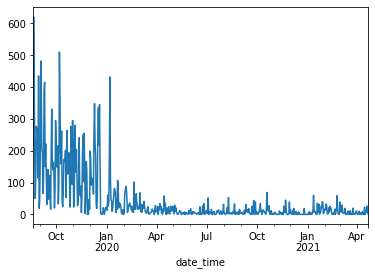

In [152]:
bayes['endpoint'].resample('d').count().plot()


<AxesSubplot:xlabel='date_time'>

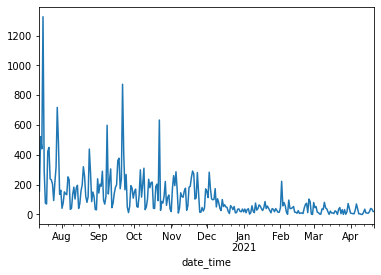

In [193]:
darden['endpoint'].resample('d').count().plot()


<AxesSubplot:xlabel='date_time'>

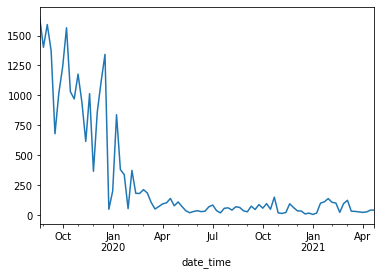

In [154]:
bayes['endpoint'].resample('w').count().plot()


In [194]:
bayes_students =pd.DataFrame(bayes.groupby(by='user_id').endpoint.resample('w').count())
curie_students =pd.DataFrame(curie.groupby(by='user_id').endpoint.resample('w').count())
darden_students =pd.DataFrame(darden.groupby(by='user_id').endpoint.resample('w').count())
easley_students =pd.DataFrame(easley.groupby(by='user_id').endpoint.resample('w').count())
florence_students =pd.DataFrame(florence.groupby(by='user_id').endpoint.resample('w').count())


In [178]:
#bayes_students

In [207]:
bayes_students = bayes_students.reset_index()

In [195]:
curie_students = curie_students.reset_index()
darden_students = darden_students.reset_index()
easley_students = easley_students.reset_index()
florence_students = florence_students.reset_index()

In [208]:
bayes_students.head()

,user_id,date_time,endpoint
0,358,2019-08-25,21
1,358,2019-09-01,29
2,358,2019-09-08,67
3,358,2019-09-15,72
4,358,2019-09-22,13


In [171]:
#bayes_students.date_time = pd.to_datetime(bayes_students.date_time)
#bayes_students = bayes_students.set_index(bayes_students.date_time)

In [181]:
bayes_students.head()

,user_id,date_time,endpoint
0,358,2019-08-25,21
1,358,2019-09-01,29
2,358,2019-09-08,67
3,358,2019-09-15,72
4,358,2019-09-22,13


In [189]:
bayes_students['user_id'] = bayes_students['user_id'].astype(str)

Instead of doing a for loop and plotting by user ID, I want to plot this in Seaborn and hue by user id

In [190]:
bayes_students.dtypes

user_id              object
date_time    datetime64[ns]
endpoint              int64
dtype: object

In [165]:
bayes.user_id.value_counts()

485    3268
475    2136
476    2075
479    2007
478    1659
482    1391
471    1380
469    1310
473    1254
466    1200
481    1108
358    1070
480    1047
484    1047
483     872
472     835
468     778
474     585
467     554
470     468
477     459
650      18
487      17
Name: user_id, dtype: int64

In [84]:
bayes_students.head()

,user_id,date_time,endpoint
0,358,2019-08-20,4
1,358,2019-08-21,3
2,358,2019-08-22,9
3,358,2019-08-23,1
4,358,2019-08-24,0


In [186]:
bayes_students.dtypes

user_id              object
date_time    datetime64[ns]
endpoint              int64
dtype: object

In [210]:
bayes_students.head()

,user_id,date_time,endpoint
0,358,2019-08-25,21
1,358,2019-09-01,29
2,358,2019-09-08,67
3,358,2019-09-15,72
4,358,2019-09-22,13


Text(0.5, 1.0, 'Individual student weekly page views during class Bayes')

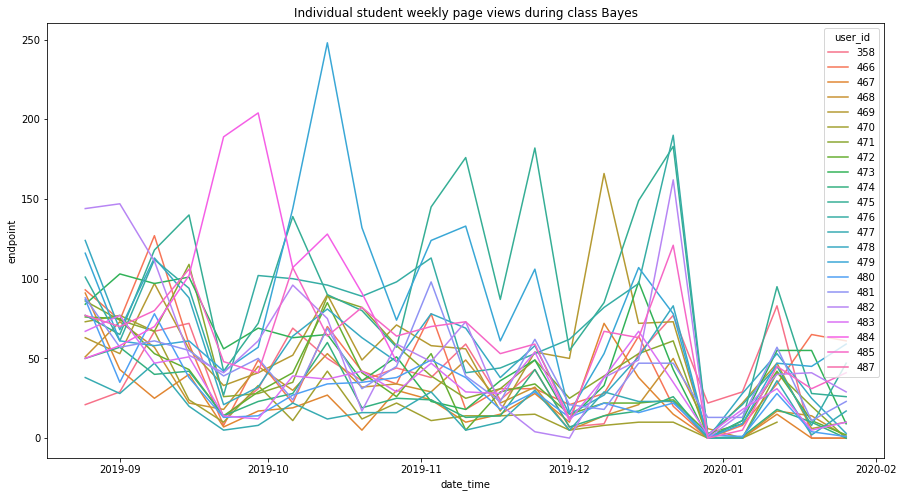

In [211]:
plt.figure(figsize=(15,8))
#sns.tsplot(data=bayes_students['endpoint'], time = bayes_students['date_time'])
sns.lineplot(x='date_time', y='endpoint', hue='user_id', data = bayes_students[bayes_students.date_time < '2020-01-31'])
plt.title('Individual student weekly page views during class Bayes')


In [212]:
curie.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2020-02-03 15:39:34,2020-02-03 15:39:34,2020-02-03 00:00:00,15:39:34,login,575,55.0,97.105.19.58,Curie,2020-02-03 00:00:00,2020-07-07 00:00:00,3,1,2020-02-03 15:39:34,-155 days,data_science
2020-02-03 15:39:37,2020-02-03 15:39:37,2020-02-03 00:00:00,15:39:37,login,575,55.0,97.105.19.58,Curie,2020-02-03 00:00:00,2020-07-07 00:00:00,3,1,2020-02-03 15:39:37,-155 days,data_science
2020-02-03 15:40:05,2020-02-03 15:40:05,2020-02-03 00:00:00,15:40:05,/,575,55.0,97.105.19.58,Curie,2020-02-03 00:00:00,2020-07-07 00:00:00,3,1,2020-02-03 15:40:05,-155 days,data_science
2020-02-04 10:56:45,2020-02-04 10:56:45,2020-02-04 00:00:00,10:56:45,1-fundamentals/1.1-intro-to-data-science,575,55.0,97.105.19.58,Curie,2020-02-03 00:00:00,2020-07-07 00:00:00,3,1,2020-02-04 10:56:45,-154 days,data_science
2020-02-04 10:56:46,2020-02-04 10:56:46,2020-02-04 00:00:00,10:56:46,1-fundamentals/modern-data-scientist.jpg,575,55.0,97.105.19.58,Curie,2020-02-03 00:00:00,2020-07-07 00:00:00,3,1,2020-02-04 10:56:46,-154 days,data_science


Text(0.5, 1.0, 'Individual student weekly page views during class Curie')

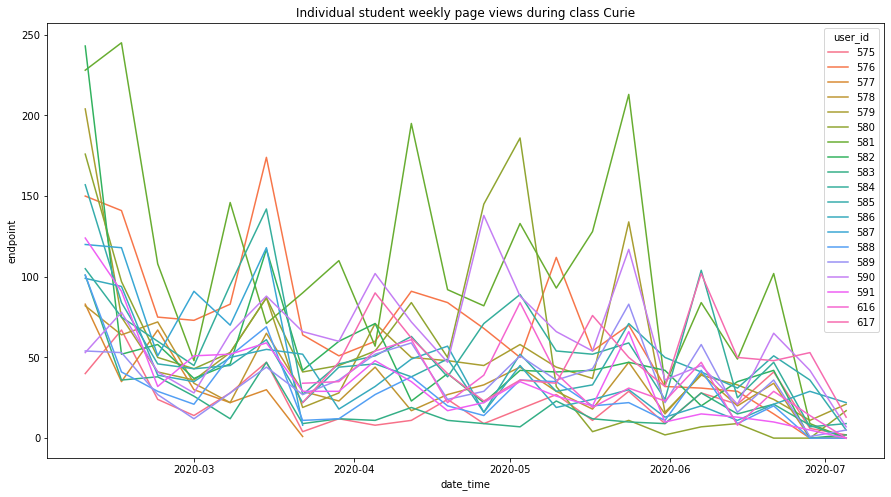

In [213]:
plt.figure(figsize=(15,8))
#sns.tsplot(data=bayes_students['endpoint'], time = bayes_students['date_time'])
sns.lineplot(x='date_time', y='endpoint', hue='user_id', data = curie_students[curie_students.date_time < '2020-07-07'])
plt.title('Individual student weekly page views during class Curie')


In [214]:
darden.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2020-07-13 14:52:10,2020-07-13 14:52:10,2020-07-13 00:00:00,14:52:10,/,268,59.0,173.174.200.226,Darden,2020-07-13 00:00:00,2021-01-12 00:00:00,3,2,2020-07-13 14:52:10,-183 days,data_science
2020-07-14 16:06:42,2020-07-14 16:06:42,2020-07-14 00:00:00,16:06:42,1-fundamentals/1.1-intro-to-data-science,268,59.0,173.174.200.226,Darden,2020-07-13 00:00:00,2021-01-12 00:00:00,3,2,2020-07-14 16:06:42,-182 days,data_science
2020-07-14 16:06:42,2020-07-14 16:06:42,2020-07-14 00:00:00,16:06:42,1-fundamentals/modern-data-scientist.jpg,268,59.0,173.174.200.226,Darden,2020-07-13 00:00:00,2021-01-12 00:00:00,3,2,2020-07-14 16:06:42,-182 days,data_science
2020-07-14 16:06:42,2020-07-14 16:06:42,2020-07-14 00:00:00,16:06:42,1-fundamentals/AI-ML-DL-timeline.jpg,268,59.0,173.174.200.226,Darden,2020-07-13 00:00:00,2021-01-12 00:00:00,3,2,2020-07-14 16:06:42,-182 days,data_science
2020-07-14 16:36:13,2020-07-14 16:36:13,2020-07-14 00:00:00,16:36:13,1-fundamentals/1.2-data-science-pipeline,268,59.0,173.174.200.226,Darden,2020-07-13 00:00:00,2021-01-12 00:00:00,3,2,2020-07-14 16:36:13,-182 days,data_science


Text(0.5, 1.0, 'Indivudual student weekly page views Darden')

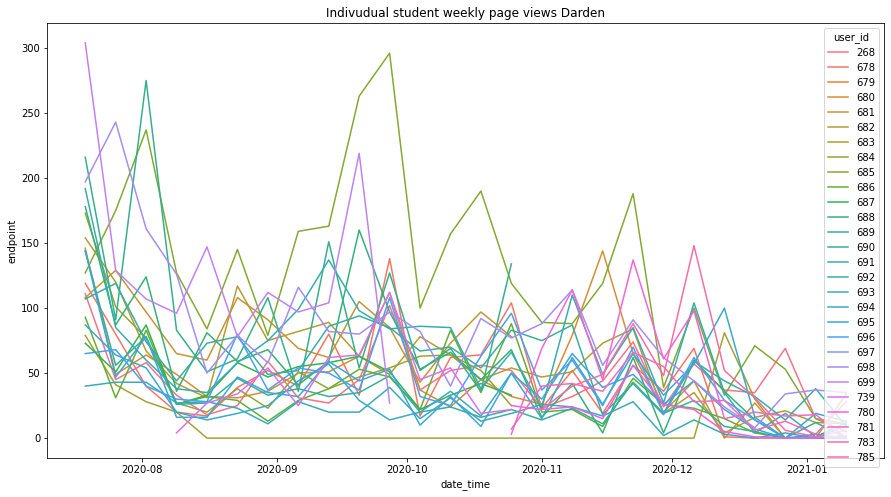

In [202]:
plt.figure(figsize=(15,8))
#sns.tsplot(data=bayes_students['endpoint'], time = bayes_students['date_time'])
sns.lineplot(x='date_time', y='endpoint', hue='user_id', data = darden_students[(darden_students.date_time < '2021-01-12') ])
plt.title('Individual student weekly page views Darden')

In [215]:
easley.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2020-12-08 10:54:45,2020-12-08 10:54:45,2020-12-08 00:00:00,10:54:45,/,143,133.0,68.201.242.151,Easley,2020-12-07 00:00:00,2021-06-08 00:00:00,3,2,2020-12-08 10:54:45,-182 days,data_science
2020-12-08 10:58:31,2020-12-08 10:58:31,2020-12-08 00:00:00,10:58:31,fundamentals/intro-to-data-science,143,133.0,68.201.242.151,Easley,2020-12-07 00:00:00,2021-06-08 00:00:00,3,2,2020-12-08 10:58:31,-182 days,data_science
2020-12-08 10:58:31,2020-12-08 10:58:31,2020-12-08 00:00:00,10:58:31,fundamentals/modern-data-scientist.jpg,143,133.0,68.201.242.151,Easley,2020-12-07 00:00:00,2021-06-08 00:00:00,3,2,2020-12-08 10:58:31,-182 days,data_science
2020-12-08 10:58:32,2020-12-08 10:58:32,2020-12-08 00:00:00,10:58:32,fundamentals/AI-ML-DL-timeline.jpg,143,133.0,68.201.242.151,Easley,2020-12-07 00:00:00,2021-06-08 00:00:00,3,2,2020-12-08 10:58:32,-182 days,data_science
2020-12-08 15:13:06,2020-12-08 15:13:06,2020-12-08 00:00:00,15:13:06,fundamentals/data-science-pipeline,143,133.0,68.201.242.151,Easley,2020-12-07 00:00:00,2021-06-08 00:00:00,3,2,2020-12-08 15:13:06,-182 days,data_science


Text(0.5, 1.0, 'Individual student weekly page views Easley')

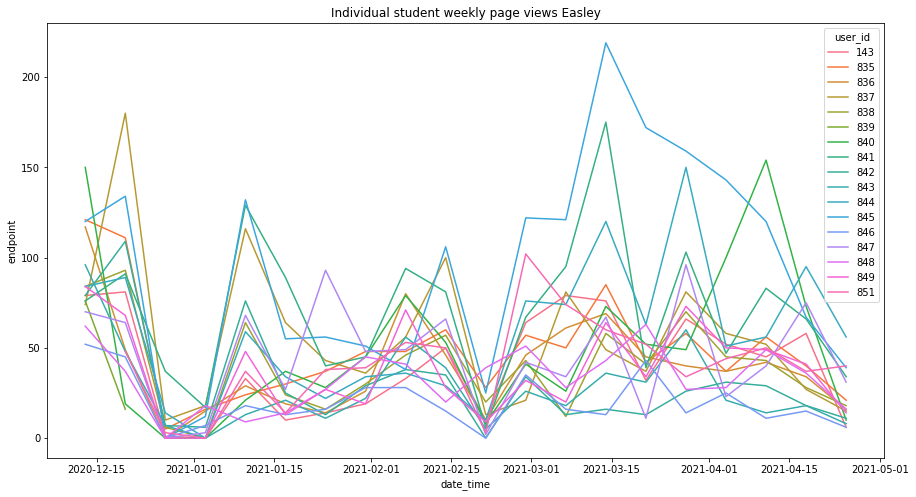

In [216]:
plt.figure(figsize=(15,8))
#sns.tsplot(data=bayes_students['endpoint'], time = bayes_students['date_time'])
sns.lineplot(x='date_time', y='endpoint', hue='user_id', data = easley_students[(easley_students.date_time < '2021-06-18') ])
plt.title('Individual student weekly page views Easley')

In [217]:
florence.head()

,date_time,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time.1,days_after_grad,program
date_time,,,,,,,,,,,,,,,
2021-03-15 15:47:10,2021-03-15 15:47:10,2021-03-15 00:00:00,15:47:10,/,895,137.0,96.8.253.119,Florence,2021-03-15 00:00:00,2021-09-03 00:00:00,3,2,2021-03-15 15:47:10,-172 days,data_science
2021-03-15 15:54:06,2021-03-15 15:54:06,2021-03-15 00:00:00,15:54:06,/,895,137.0,96.8.253.119,Florence,2021-03-15 00:00:00,2021-09-03 00:00:00,3,2,2021-03-15 15:54:06,-172 days,data_science
2021-03-15 16:13:29,2021-03-15 16:13:29,2021-03-15 00:00:00,16:13:29,fundamentals/intro-to-data-science,895,137.0,96.8.253.119,Florence,2021-03-15 00:00:00,2021-09-03 00:00:00,3,2,2021-03-15 16:13:29,-172 days,data_science
2021-03-15 16:13:30,2021-03-15 16:13:30,2021-03-15 00:00:00,16:13:30,fundamentals/modern-data-scientist.jpg,895,137.0,96.8.253.119,Florence,2021-03-15 00:00:00,2021-09-03 00:00:00,3,2,2021-03-15 16:13:30,-172 days,data_science
2021-03-15 16:13:30,2021-03-15 16:13:30,2021-03-15 00:00:00,16:13:30,fundamentals/AI-ML-DL-timeline.jpg,895,137.0,96.8.253.119,Florence,2021-03-15 00:00:00,2021-09-03 00:00:00,3,2,2021-03-15 16:13:30,-172 days,data_science


Text(0.5, 1.0, 'Individual student weekly page views Florence')

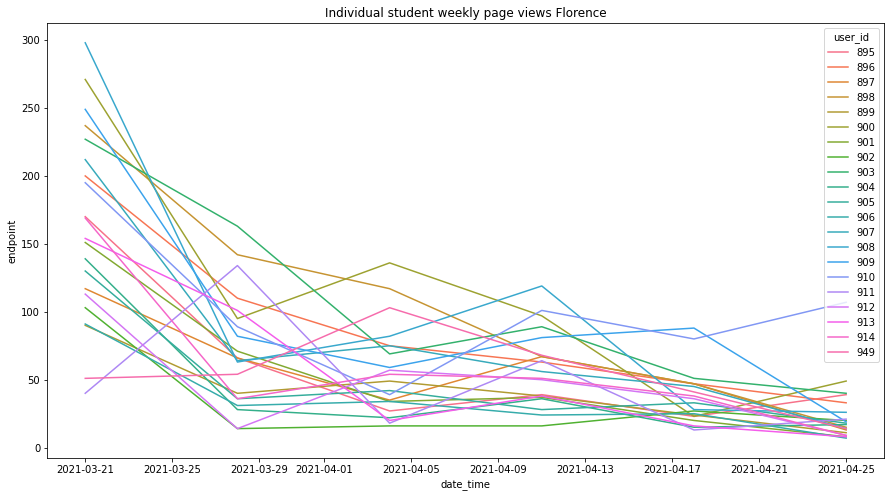

In [219]:
plt.figure(figsize=(15,8))
#sns.tsplot(data=bayes_students['endpoint'], time = bayes_students['date_time'])
sns.lineplot(x='date_time', y='endpoint', hue='user_id', data = florence_students[(florence_students.date_time < '2021-09-03') ])
plt.title('Individual student weekly page views Florence')

In [94]:
len(bayes.user_id.unique())

23

In [92]:
bayes_students[bayes_students.date_time < '2020-01-31']

,user_id,date_time,endpoint
0,358,2019-08-20,4
1,358,2019-08-21,3
2,358,2019-08-22,9
3,358,2019-08-23,1
4,358,2019-08-24,0
5,358,2019-08-25,4
6,358,2019-08-26,3
7,358,2019-08-27,3
8,358,2019-08-28,5
9,358,2019-08-29,1


In [91]:
pd. set_option('display.max_rows', None) # or 1000.


In [55]:
type(bayes_students)

pandas.core.series.Series

In [ ]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes_students.date_time
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

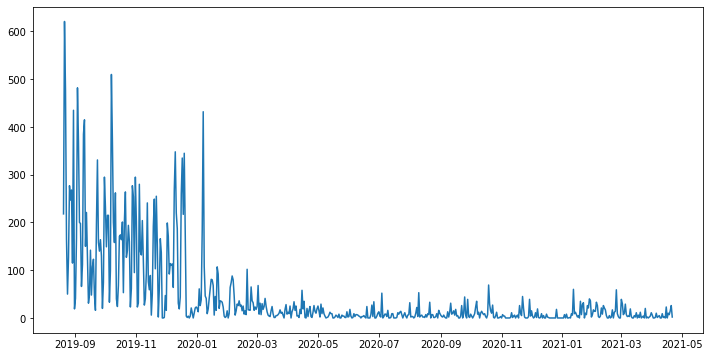

In [44]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes.date
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

In [ ]:

ax.set_xlim(data['Dates'].min(), data['Dates'].max())


In [38]:
bayes_pages

date_time
2019-08-20    218
2019-08-21    621
2019-08-22    476
2019-08-23    165
2019-08-24     50
             ... 
2021-04-17     10
2021-04-18      7
2021-04-19     15
2021-04-20     26
2021-04-21      2
Freq: D, Name: endpoint, Length: 611, dtype: int64

In [ ]:
sns.lineplot(x='date' y='endpoint')

In [14]:
df[df.program_id==4].cohort_name.value_counts()

Apollo    5
Name: cohort_name, dtype: int64

In [15]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [16]:
df.endpoint.value_counts()

/                                                 45854
javascript-i                                      18203
toc                                               17591
search/search_index.json                          17534
java-iii                                          13166
                                                  ...  
5-stats                                               1
java-ii/file-op                                       1
html-css/img/favicon.ico                              1
content/examples/constructors-destructors.html        1
where                                                 1
Name: endpoint, Length: 2224, dtype: int64